In [1]:
import numpy as np
from decision_tree import DecisionTree
from collections import Counter

In [2]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size= n_samples, replace= True)
    return X[indices], y[indices]

In [3]:
def most_common_label(y):
    
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

In [4]:
class RandomForest:
    def __init__(self, n_trees= 100, min_samples_split= 2, max_depth= 1500, n_features= None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.trees = []
    
    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split= self.min_samples_split, 
            max_depth= self.max_depth, n_features= self.n_features)
            X_sample, y_sample = bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_predictions = np.swapaxes(tree_predictions, 0, 1)
        y_predictions = [most_common_label(tree_prediction) for tree_prediction in tree_predictions]
        return np.array(y_predictions)

    def accuracy(self, predictions, y_test):
        return np.sum(predictions == y_test) / len(y_test)

In [5]:
import pandas as pd
from scipy.io import loadmat

In [6]:
data5 = loadmat('data5.mat')
data = pd.DataFrame(data5['x']) 
data = data.sample(frac= 1, random_state= 3)

In [7]:
X = data.iloc[:, :72]
X = (X - X.mean(axis= 0)) / X.std(axis= 0)
y = data.iloc[:, 72]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [9]:
forest = RandomForest(n_trees= 5, max_depth= 2000)

In [10]:
forest.fit(X_train, y_train)

In [11]:
predictions = forest.predict(X_test)

In [12]:
score = forest.accuracy(predictions, y_test)
score

0.925512104283054

In [13]:
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt

In [14]:
cm = metrics.confusion_matrix(y_test, predictions)

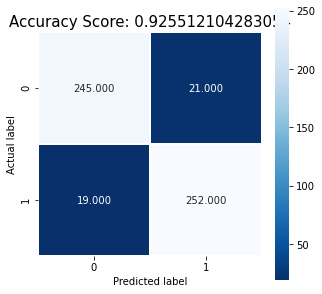

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()